Predict whether income exceeds $50K/yr based on census data

# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

# Importing the DataSet

In [2]:
df=pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
len(df.fnlwgt.unique())

21648

In [6]:
df.shape

(32561, 15)

### will replace the column name 'fnlwgt' to 'final_name'

In [101]:
df.rename(columns={'fnlwgt':'final_name'},inplace=True)

In [103]:
df.head()

,age,workclass,final_name,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## will check for null values

In [7]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [8]:
df.shape

(32561, 15)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [105]:
for i in df.columns:
    print(i)
    print(df[i].unique())

age
[90 82 66 54 41 34 38 74 68 45 52 32 51 46 57 22 37 29 61 21 33 49 23 59
 60 63 53 44 43 71 48 73 67 40 50 42 39 55 47 31 58 62 36 72 78 83 26 70
 27 35 81 65 25 28 56 69 20 30 24 64 75 19 77 80 18 17 76 79 88 84 85 86
 87]
workclass
['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
final_name
[ 77053 132870 186061 ...  34066  84661 257302]
education
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
education.num
[ 9 10  4  6 16 15 13 14  7 12 11  2  3  8  5  1]
marital.status
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation
['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protect

### you can see in the data where:-workclass,occupation,native.country has '?' instead of having null in the data so that will replace those null values using mode because its a categorical data

In [8]:
#Beforing replacing will see what are all the records having ? and howmany data having ? 

In [9]:
len(df.workclass[df.workclass=='?'])

1836

In [10]:
len(df.occupation[df.occupation=='?'])

1843

In [111]:
len(df[df['native.country']=='?'])

583

In [112]:
df.replace('?',np.nan,inplace=True)

In [113]:
df.isnull().sum()

age                  0
workclass         1836
final_name           0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [116]:
# will only print those data which are having null values
null_cols=df.isnull().sum()
null_cols[null_cols>1]

workclass         1836
occupation        1843
native.country     583
dtype: int64

## Data Preprocessing 

In [118]:
#First will copy the data in another variable without affecting original dataset will perform the task
new_df=df.copy(deep=True)

In [128]:
# now will replace the missing values with most accoring data ex(using mode)

from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
filled_df=imputer.fit_transform(new_df)
df1=pd.DataFrame(filled_df,columns=new_df.columns)

In [13]:
for i in df:
    print(i)
    print(df[i].mode())

age
0    36
dtype: int64
workclass
0    Private
dtype: object
fnlwgt
0    123011
1    164190
2    203488
dtype: int64
education
0    HS-grad
dtype: object
education.num
0    9
dtype: int64
marital.status
0    Married-civ-spouse
dtype: object
occupation
0    Prof-specialty
dtype: object
relationship
0    Husband
dtype: object
race
0    White
dtype: object
sex
0    Male
dtype: object
capital.gain
0    0
dtype: int64
capital.loss
0    0
dtype: int64
hours.per.week
0    40
dtype: int64
native.country
0    United-States
dtype: object
income
0    <=50K
dtype: object


In [147]:
df1.isnull().sum()

age               0
workclass         0
final_name        0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

## now will fill the null values using manualy

In [152]:
df1=new_df.copy(deep=True)

In [168]:
for i in ['workclass','occupation','native.country']:
    df1[i]=df1[i].fillna(df1[i].mode()[0])

In [169]:
df1.isnull().sum()

age               0
workclass         0
final_name        0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

### see now we have filled the missing data with mode

In [170]:
df1.head()

,age,workclass,final_name,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### Will work on the target variable (income)

In [171]:
df1.income.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [172]:
df1.income.value_counts(normalize=True)*100

<=50K    75.919044
>50K     24.080956
Name: income, dtype: float64

### The data is highly imbalanced so we want to perform SMOTE operation (oversampling technique)

In [173]:
df1.income.replace({'<=50K':0,'>50K':1},inplace=True)

In [174]:
df1.head()

,age,workclass,final_name,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [14]:
df.sex.value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [175]:
df1.dtypes

age                int64
workclass         object
final_name         int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income             int64
dtype: object

In [176]:
# will seperate the numerical and categorical data oneside to perform some task

num_cols=df1.select_dtypes(include='int')
cat_cols=df1.select_dtypes(include='object')

In [181]:
num_cols.head()

,age,final_name,education.num,capital.gain,capital.loss,hours.per.week,income
0,90,77053,9,0,4356,40,0
1,82,132870,9,0,4356,18,0
2,66,186061,10,0,4356,40,0
3,54,140359,4,0,3900,40,0
4,41,264663,10,0,3900,40,0


### will check if the data is having outliers or not by ploting the box plot, because of outliers the logistic model get affected

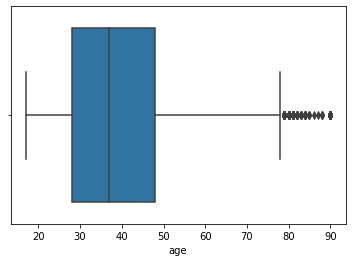

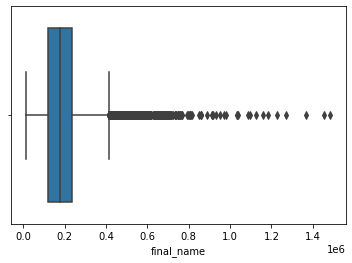

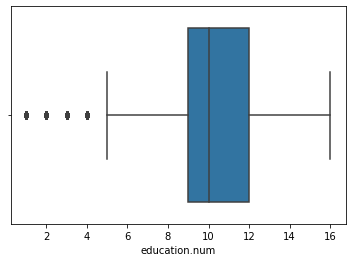

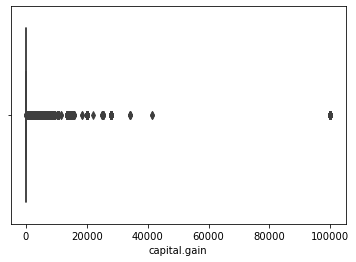

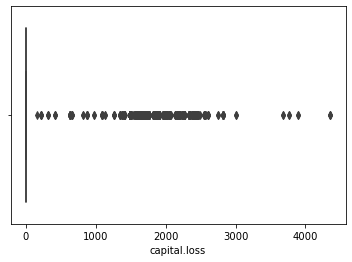

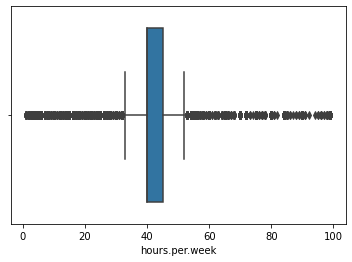

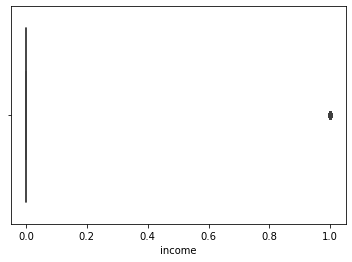

In [182]:
for i in num_cols.columns:
    sns.boxplot(df1[i])
    plt.show()

### first will build the base model without doing anything after that will treat all those and check the accuracy of the model wether it is increased or not

In [183]:
# will perfrom label encoding for the categorical data 

In [185]:
cat_cols.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
0,Private,HS-grad,Widowed,Prof-specialty,Not-in-family,White,Female,United-States
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States
2,Private,Some-college,Widowed,Prof-specialty,Unmarried,Black,Female,United-States
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States


In [195]:
for i in cat_cols.columns:
    print(i)
    print(cat_cols[i].value_counts())

workclass
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
marital.status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64
occupation
Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-

In [192]:
from sklearn.preprocessing import LabelEncoder

In [196]:
le=LabelEncoder()
le.fit_transform(df1['workclass'])

array([3, 3, 3, ..., 3, 3, 3])

In [199]:
df1.head(2)

,age,workclass,final_name,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0


In [200]:
X=df1.drop('income',axis=1)
y=df1['income']

In [201]:
for i in cat_cols.columns:
    X[i]=le.fit_transform(X[i])

In [202]:
X.head(2)

,age,workclass,final_name,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38


In [203]:
# now all the categorical data has been converted in to numeric, now will build the model
# here we have not done any thing we are just building the base model 
# will scaledown the data and keep in to same scale by using StandardScaler where mean=0,standard deviation =1

In [204]:
from sklearn.preprocessing import StandardScaler

In [206]:
sc=StandardScaler()
X_sc=sc.fit_transform(X)

In [207]:
scaled_X=pd.DataFrame(X_sc,columns=X.columns)

In [209]:
#now will split the data into train test split
from sklearn.model_selection import train_test_split

In [482]:
X_train,X_test,y_train,y_test=train_test_split(scaled_X,y,test_size=0.25,random_state=0)

In [483]:
# will build the model using logistic regression as a base model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [484]:
model.fit(X_train,y_train)

LogisticRegression()

In [485]:
y_pred=model.predict(X_test)

In [486]:
# will check the performance of the model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [487]:
confusion_matrix(y_test,y_pred)

array([[5846,  347],
       [1096,  852]], dtype=int64)

In [488]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6193
           1       0.71      0.44      0.54      1948

    accuracy                           0.82      8141
   macro avg       0.78      0.69      0.72      8141
weighted avg       0.81      0.82      0.81      8141



you can see over here the model is imbalanced so we are getting accuracy as 82% if the data is imbalanced we should not consider accuracy we should consider the f1-score of 0 and 1 we can see in the above classification report the f1-score of 1 the model is giving only 54% so we want to improve it  

In [489]:
os=SMOTETomek(1)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 18527, 1: 5893})
The number of classes after fit Counter({0: 18124, 1: 18124})


In [490]:
model2=LogisticRegression()

In [491]:
model2.fit(X_train_ns,y_train_ns)
y_pred=model2.predict(X_test)

In [492]:
confusion_matrix(y_test,y_pred)

array([[4818, 1375],
       [ 489, 1459]], dtype=int64)

In [493]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84      6193
           1       0.51      0.75      0.61      1948

    accuracy                           0.77      8141
   macro avg       0.71      0.76      0.72      8141
weighted avg       0.81      0.77      0.78      8141



In [495]:
from imblearn.over_sampling import RandomOverSampler

In [501]:
os=RandomOverSampler(1)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 18527, 1: 5893})
The number of classes after fit Counter({0: 18527, 1: 18527})


In [500]:
y_train_ns.shape

(37054,)

In [502]:
model2.fit(X_train_ns,y_train_ns)
y_pred=model2.predict(X_test)

In [503]:
confusion_matrix(y_test,y_pred)

array([[4826, 1367],
       [ 500, 1448]], dtype=int64)

In [505]:
from sklearn.ensemble import RandomForestClassifier

In [506]:
model3=RandomForestClassifier()

In [508]:
model3.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [509]:
y_pred=model3.predict(X_test)

In [510]:
confusion_matrix(y_test,y_pred)

array([[5621,  572],
       [ 650, 1298]], dtype=int64)

In [511]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      6193
           1       0.69      0.67      0.68      1948

    accuracy                           0.85      8141
   macro avg       0.80      0.79      0.79      8141
weighted avg       0.85      0.85      0.85      8141



In [512]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [516]:
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_ns, y_train_ns)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [517]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [518]:
model4=RandomForestClassifier(criterion='gini',max_depth=8,max_features='sqrt',n_estimators=500)

In [520]:
model4.fit(X_train,y_train)
y_train_pred=model4.predict(X_train)
y_test_pred=model4.predict(X_test)

In [521]:
confusion_matrix(y_train,y_train_pred)

array([[17818,   709],
       [ 2665,  3228]], dtype=int64)

In [522]:
confusion_matrix(y_test,y_test_pred)

array([[5943,  250],
       [ 946, 1002]], dtype=int64)

In [523]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      6193
           1       0.80      0.51      0.63      1948

    accuracy                           0.85      8141
   macro avg       0.83      0.74      0.77      8141
weighted avg       0.85      0.85      0.84      8141



<AxesSubplot:>

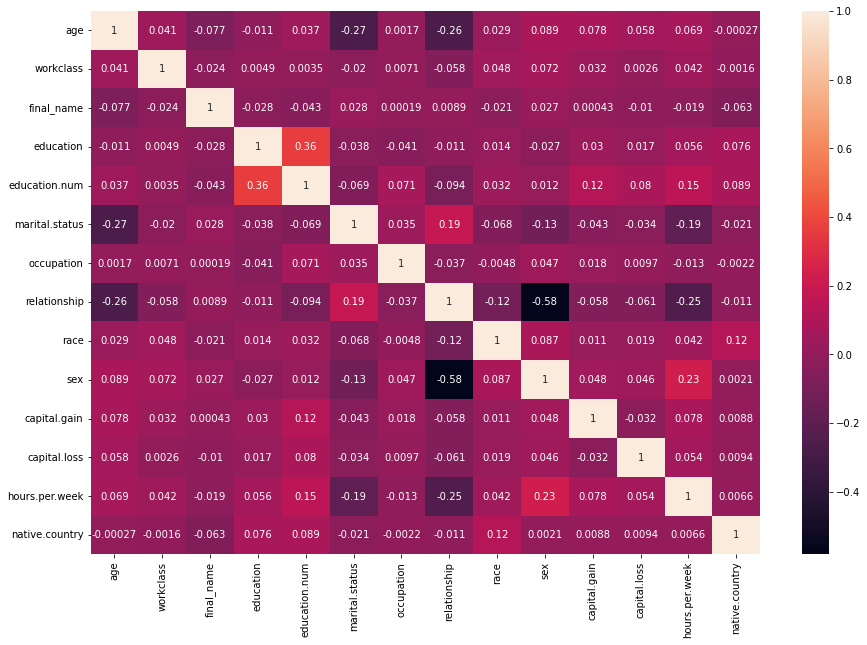

In [293]:
plt.figure(figsize=(15,10))
sns.heatmap(X.corr(),annot=True)

In [294]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [296]:
VIF=pd.DataFrame()

VIF['Features']=X.columns
VIF['Vif']=[variance_inflation_factor(X.values,i)  for i in range(len(X.columns))]

In [297]:
VIF

,Features,Vif
0,age,8.852286
1,workclass,8.436313
2,final_name,4.042085
3,education,9.232330
4,education.num,18.725471
5,marital.status,4.079640
6,occupation,3.385837
7,relationship,2.673831
8,race,17.894934
9,sex,4.498179


You can see over here education.num,race,native.country can be droped because its having high multicolinearity 

## Now the real game starts 

In [217]:
df1.head(3)

,age,workclass,final_name,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0


In [219]:
num_cols.head(3)

,age,final_name,education.num,capital.gain,capital.loss,hours.per.week,income
0,90,77053,9,0,4356,40,0
1,82,132870,9,0,4356,18,0
2,66,186061,10,0,4356,40,0


In [220]:
cat_cols.head(3)

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
0,Private,HS-grad,Widowed,Prof-specialty,Not-in-family,White,Female,United-States
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States
2,Private,Some-college,Widowed,Prof-specialty,Unmarried,Black,Female,United-States


age


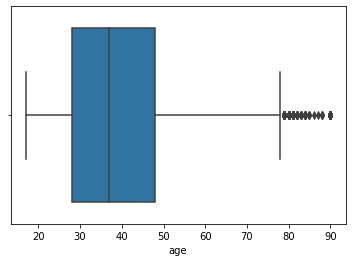

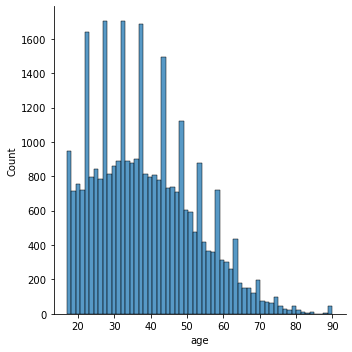

final_name


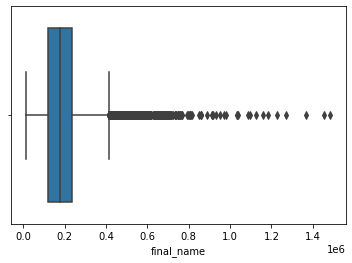

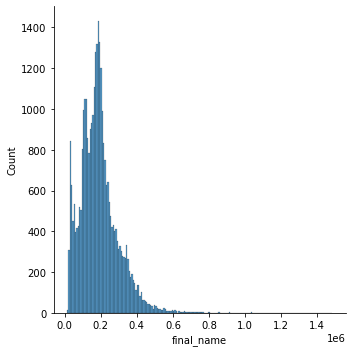

education.num


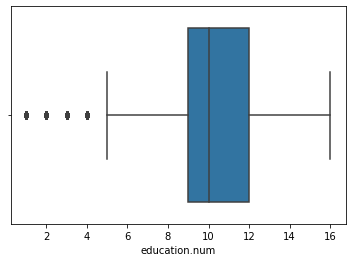

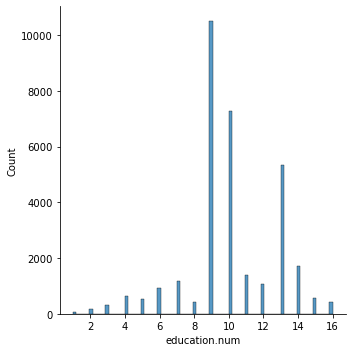

capital.gain


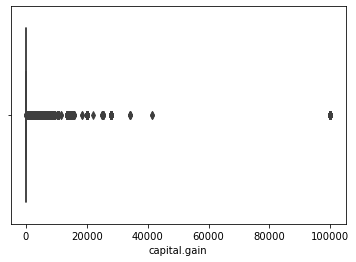

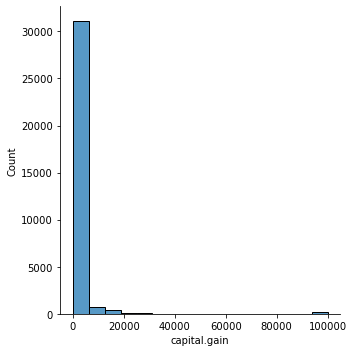

capital.loss


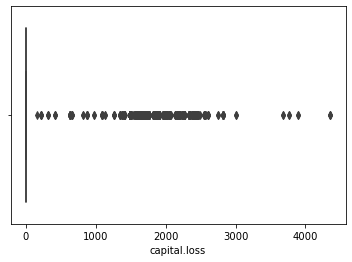

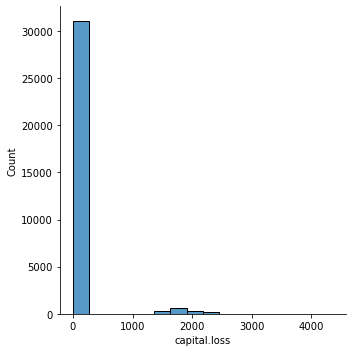

hours.per.week


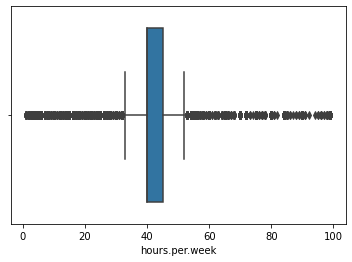

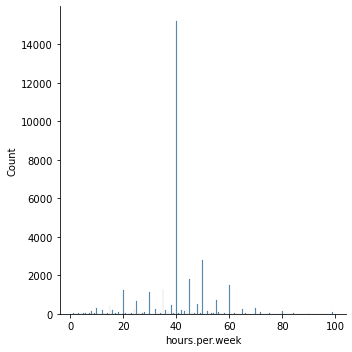

income


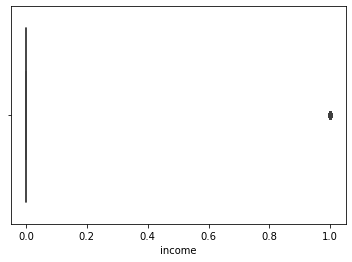

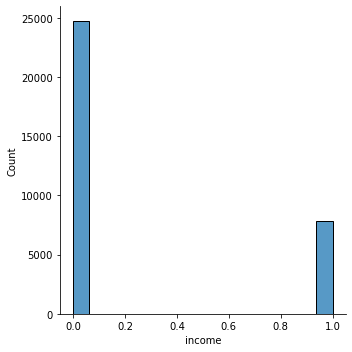

In [225]:
for i in num_cols.columns:
    print(i)
    sns.boxplot(num_cols[i])
    sns.displot(num_cols[i])
    plt.show()

In [28]:
df[df.capital.gain>80000]

AttributeError: 'DataFrame' object has no attribute 'capital'

In [283]:
a=df1[df1.income==0]
b=df1[df1.income==1]
for i in num_cols.columns:
    print(i)
    print(ttest_ind(a[i],b[i]))
    print()

age
Ttest_indResult(statistic=-43.4362442404511, pvalue=0.0)

final_name
Ttest_indResult(statistic=1.7075109328052853, pvalue=0.08773666108063947)

education.num
Ttest_indResult(statistic=-64.18797223551665, pvalue=0.0)

capital.gain
Ttest_indResult(statistic=-41.34186816949368, pvalue=0.0)

capital.loss
Ttest_indResult(statistic=-27.474177904925856, pvalue=2.6865471890579053e-164)

hours.per.week
Ttest_indResult(statistic=-42.583873499437956, pvalue=0.0)

income
Ttest_indResult(statistic=-inf, pvalue=0.0)



By using statistical test we can see that final_name has pvalue is greater than 0.05 where its telling that the means are same so it is not impacting much to the target variable so we can drop the final_name feature

In [300]:
num_cols.drop('final_name',axis=1,inplace=True)    

In [299]:
num_cols.drop(['education.num'],axis=1,inplace=True)    # based on multicolinearity check(VIF) we are going to drop the 'education.num'

In [301]:
num_cols.head()

,age,capital.gain,capital.loss,hours.per.week,income
0,90,0,4356,40,0
1,82,0,4356,18,0
2,66,0,4356,40,0
3,54,0,3900,40,0
4,41,0,3900,40,0


In [312]:
df1['capital.gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
4931         1
7978         1
5060         1
2538         1
Name: capital.gain, Length: 119, dtype: int64

In [226]:
# will perform some operation to treat the outliers and will use the QQ-plot and histogram to see if the data is normaly distributed or not 

In [258]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
import pylab
import scipy.stats as stat

def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.boxplot(df[feature])
#     plt.subplot(1,2,1)
#     df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
    

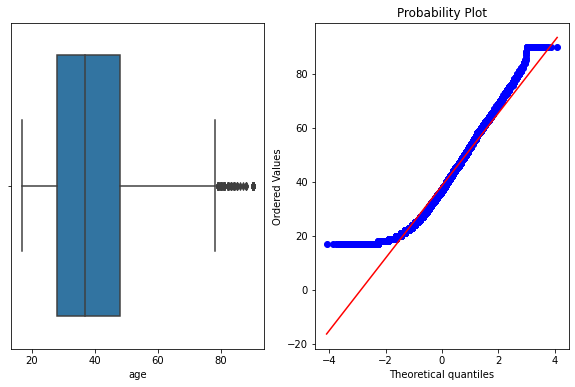

In [261]:
plot_data(df,'age')

<AxesSubplot:xlabel='age'>

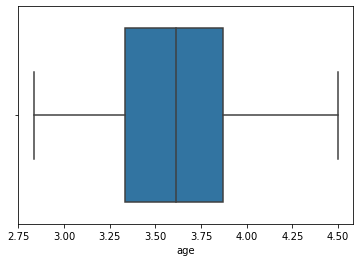

In [264]:
sns.boxplot(np.log(df1.age))      # you can see over here the log transformation has removed the outlier where the data are at the right skewed

In [410]:
num_cols['age']=np.log(df1.age)

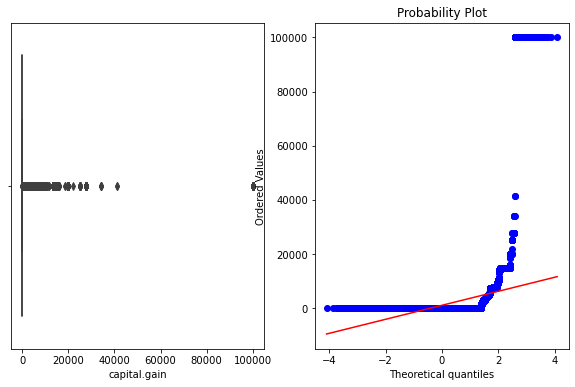

In [314]:
plot_data(df,'capital.gain')

In [320]:
df['capital.gain'].describe()

count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital.gain, dtype: float64

In [321]:
99999/10

9999.9

In [326]:
for i in range(0,99999,9999):
    m=len(df[df['capital.gain']>=i])
    print('There are {} is greater than {}'.format(m,i))

There are 32561 is greater than 0
There are 770 is greater than 9999
There are 253 is greater than 19998
There are 166 is greater than 29997
There are 161 is greater than 39996
There are 159 is greater than 49995
There are 159 is greater than 59994
There are 159 is greater than 69993
There are 159 is greater than 79992
There are 159 is greater than 89991
There are 159 is greater than 99990


In [328]:
# their is one value which has extreme outliers will check which data it is and will remove it 
len(df[df['capital.gain']>89991])

159

In [342]:
len(df1[(df1['capital.gain']>89991)&(df1['income']==1)])

245

In [389]:
len(df[df['capital.gain']>9999])

770

In [390]:
len(df1[(df1['capital.gain']>9999)&(df1['income']==1)])

756

In [361]:
len(df1[(df1['capital.gain']>41000)&(df1['income']==0)])

2

In [362]:
df1[(df1['capital.gain']>)&(df1['income']==0)]

,age,workclass,final_name,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1678,27,Private,211032,Preschool,1,Married-civ-spouse,Farming-fishing,Other-relative,White,Male,41310,0,24,Mexico,0
1679,63,Self-emp-not-inc,289741,Masters,14,Married-civ-spouse,Farming-fishing,Husband,White,Male,41310,0,50,United-States,0


In [337]:
df1['capital.gain'].describe()

count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital.gain, dtype: float64

In [396]:
num_cols['capital.gain']=np.where(df1['capital.gain']>0,1,df1['capital.gain'])

In [397]:
num_cols.head()

,age,capital.gain,capital.loss,hours.per.week,income
0,90,0,4356,40,0
1,82,0,4356,18,0
2,66,0,4356,40,0
3,54,0,3900,40,0
4,41,0,3900,40,0


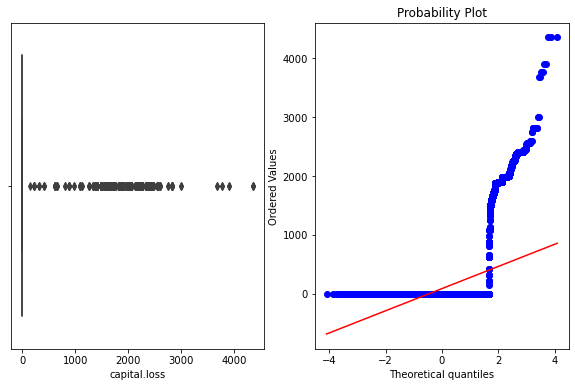

In [398]:
plot_data(df1,'capital.loss')

In [399]:
df1['capital.loss'].value_counts()

0       31042
1902      202
1977      168
1887      159
1485       51
        ...  
2201        1
2163        1
1944        1
1539        1
2472        1
Name: capital.loss, Length: 92, dtype: int64

In [402]:
num_cols['capital.loss']=np.where(df1['capital.loss']>0,1,df1['capital.loss'])

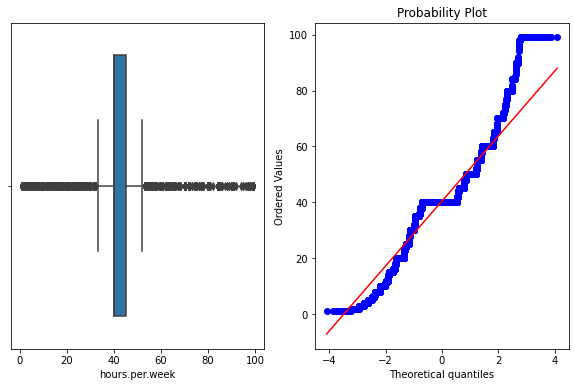

In [403]:
plot_data(df1,'hours.per.week')

In [411]:
num_cols.head()

,age,capital.gain,capital.loss,hours.per.week,income
0,4.499810,0,1,40,0
1,4.406719,0,1,18,0
2,4.189655,0,1,40,0
3,3.988984,0,1,40,0
4,3.713572,0,1,40,0


In [21]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [27]:
df[df.select_dtypes(exclude='object').columns]

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,90,77053,9,0,4356,40
1,82,132870,9,0,4356,18
2,66,186061,10,0,4356,40
3,54,140359,4,0,3900,40
4,41,264663,10,0,3900,40
...,...,...,...,...,...,...
32556,22,310152,10,0,0,40
32557,27,257302,12,0,0,38
32558,40,154374,9,0,0,40
32559,58,151910,9,0,0,40


In [412]:
cat_cols.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
0,Private,HS-grad,Widowed,Prof-specialty,Not-in-family,White,Female,United-States
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States
2,Private,Some-college,Widowed,Prof-specialty,Unmarried,Black,Female,United-States
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States


based on vif we are droping race,native.country

In [415]:
cat_cols.drop(['race','native.country'],axis=1,inplace=True)

In [418]:
cat_cols.head()

,workclass,education,marital.status,occupation,relationship,sex
0,Private,HS-grad,Widowed,Prof-specialty,Not-in-family,Female
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,Female
2,Private,Some-college,Widowed,Prof-specialty,Unmarried,Female
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,Female
4,Private,Some-college,Separated,Prof-specialty,Own-child,Female


In [425]:
categories=pd.DataFrame()
for i in cat_cols.columns:
    categories[i]=le.fit_transform(cat_cols[i])

In [428]:
categories.head(2)

,workclass,education,marital.status,occupation,relationship,sex
0,3,11,6,9,1,0
1,3,11,6,3,1,0


In [442]:
df2=pd.concat([num_cols,categories],axis=1)
df2.head()

,age,capital.gain,capital.loss,hours.per.week,income,workclass,education,marital.status,occupation,relationship,sex
0,4.499810,0,1,40,0,3,11,6,9,1,0
1,4.406719,0,1,18,0,3,11,6,3,1,0
2,4.189655,0,1,40,0,3,15,6,9,4,0
3,3.988984,0,1,40,0,3,5,0,6,4,0
4,3.713572,0,1,40,0,3,15,5,9,3,0


In [443]:
df2_sc=sc.fit_transform(df2.drop('income',axis=1))

In [448]:
df2.columns

Index(['age', 'capital.gain', 'capital.loss', 'hours.per.week', 'income',
       'workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'sex'],
      dtype='object')

In [449]:
df2=pd.DataFrame(df2_sc,columns=['age', 'capital.gain', 'capital.loss', 'hours.per.week',
       'workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'sex'])

In [452]:
X=df2
y=df1['income']

In [453]:
y.value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [455]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [454]:
# the data is unbalanced so we use smote to make balanced where we are doing upsampling

from imblearn.combine import SMOTETomek

In [459]:
from collections import Counter
Counter(y_train)

Counter({0: 18527, 1: 5893})

In [461]:
os=SMOTETomek(1)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 18527, 1: 5893})
The number of classes after fit Counter({0: 17993, 1: 17993})


In [463]:
model2=LogisticRegression()

In [464]:
model2.fit(X_train_ns,y_train_ns)

LogisticRegression()

In [467]:
y_pred=model2.predict(X_test)

In [468]:
confusion_matrix(y_test,y_pred)

array([[4395, 1798],
       [ 499, 1449]], dtype=int64)